'Camera': 0

'Selection': 1

'Ability': 2

'Right Click': 3

'SetControlGroup': 4

'GetControlGroup': 5

'AddToControlGroup': 6

'ControlGroup': 7

In [217]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

In [34]:
train = pd.read_pickle('data/train.pkl')
test = pd.read_pickle('data/test.pkl')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67091776 entries, 0 to 67091775
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   game_id         float32
 1   winner          float32
 2   time            float32
 3   player          float32
 4   species         float32
 5   event           float32
 6   event_contents  object 
dtypes: float32(6), object(1)
memory usage: 2.0+ GB


In [36]:
train.head()

,game_id,winner,time,player,species,event,event_contents
0,0.0,1.0,0.0,0.0,0.0,0.0,"at (145.25, 21.5078125)"
1,0.0,1.0,0.0,1.0,0.0,0.0,"at (22.75, 147.0078125)"
2,0.0,1.0,0.0,0.0,0.0,1.0,['OrbitalCommand [3080001]']
3,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV
4,0.0,1.0,0.0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)"


In [78]:
def plot_camera(df, game_id):
    df = df.loc[df['game_id']==game_id]
    df = df.loc[df['event']==0]
    df_0 = df.loc[df['player']==0]
    df_1 = df.loc[df['player']==1]

    winner = df['winner'].iloc[0]
    game_time = df['time'].values[-1]
    player_0_species = df_0['species'].iloc[0]
    player_1_species = df_1['species'].iloc[0]

    player_0_camera = np.array([item.replace('at (', '').replace(')', '').split(',') for item in df_0['event_contents']]).astype(float)
    player_1_camera = np.array([item.replace('at (', '').replace(')', '').split(',') for item in df_1['event_contents']]).astype(float)
    start_idx = 400
    plt.scatter(player_0_camera[start_idx:, 0], player_0_camera[start_idx:, 1], label='player_0', alpha=0.3, color='b', s=50)
    plt.scatter(player_1_camera[start_idx:, 0], player_1_camera[start_idx:, 1], label='player_1', alpha=0.3, color='r', s=50)
    plt.legend()
    plt.show()
    
    print('Total game time: %s'%(game_time))
    print('Winner: Player_%i'%(winner))
    print('Player_0: %s'%(player_0_species))
    print('Player_1: %s'%(player_1_species))
    
    return player_0_camera, player_1_camera

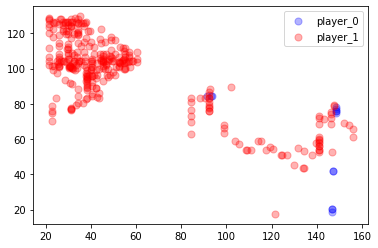

Total game time: 9.0
Winner: Player_0
Player_0: 1.0
Player_1: 2.0


In [79]:
player_0_camera, player_1_camera = plot_camera(train, 2)

In [80]:
player_0_camera.shape

(413, 2)

In [212]:
game1 = train.loc[train['game_id']==10]
game1 = game1.loc[train['event']==2]
Train = game1['event_contents'].str.contains('Train')
Morph = game1['event_contents'].str.contains('Morph')
game1 = game1[Train | Morph]
game1_p0 = game1.loc[game1['player']==0]
game1_p1 = game1.loc[game1['player']==1]

In [213]:
game1_p0

,game_id,winner,time,player,species,event,event_contents
17913,10.0,0.0,0.0,0.0,1.0,2.0,(15E0) - TrainProbe
17946,10.0,0.0,0.0,0.0,1.0,2.0,(15E0) - TrainProbe
17994,10.0,0.0,0.0,0.0,1.0,2.0,(15E0) - TrainProbe
18168,10.0,0.0,1.0,0.0,1.0,2.0,(15E0) - TrainProbe
18222,10.0,0.0,1.0,0.0,1.0,2.0,(15E0) - TrainProbe
18268,10.0,0.0,1.0,0.0,1.0,2.0,(15E0) - TrainProbe
18327,10.0,0.0,2.0,0.0,1.0,2.0,(15E0) - TrainProbe
18383,10.0,0.0,2.0,0.0,1.0,2.0,(15E0) - TrainProbe
18427,10.0,0.0,2.0,0.0,1.0,2.0,(15E0) - TrainProbe
18637,10.0,0.0,3.0,0.0,1.0,2.0,(1586) - TrainAdept


In [214]:
game1_p1

,game_id,winner,time,player,species,event,event_contents
17911,10.0,0.0,0.0,1.0,0.0,2.0,(1360) - TrainSCV
18085,10.0,0.0,1.0,1.0,0.0,2.0,(1360) - TrainSCV
18112,10.0,0.0,1.0,1.0,0.0,2.0,(1360) - TrainSCV
18151,10.0,0.0,1.0,1.0,0.0,2.0,(1360) - TrainSCV
18329,10.0,0.0,2.0,1.0,0.0,2.0,(13E0) - TrainMarine
18405,10.0,0.0,2.0,1.0,0.0,2.0,(13E0) - TrainMarine
18552,10.0,0.0,2.0,1.0,0.0,2.0,(1360) - TrainSCV
18569,10.0,0.0,2.0,1.0,0.0,2.0,(13E0) - TrainMarine
18600,10.0,0.0,2.0,1.0,0.0,2.0,(1360) - TrainSCV
18770,10.0,0.0,3.0,1.0,0.0,2.0,(1360) - TrainSCV


In [218]:
train[(train['event']==2)&(train['player']==0)&(train['game_id']==10)]

,game_id,winner,time,player,species,event,event_contents
17913,10.0,0.0,0.0,0.0,1.0,2.0,(15E0) - TrainProbe
17946,10.0,0.0,0.0,0.0,1.0,2.0,(15E0) - TrainProbe
17994,10.0,0.0,0.0,0.0,1.0,2.0,(15E0) - TrainProbe
18047,10.0,0.0,0.0,0.0,1.0,2.0,"(1543) - BuildGateway; Location: (146.5, 144.5..."
18049,10.0,0.0,0.0,0.0,1.0,2.0,"(5A0) - Attack; Location: (36.0341796875, 27.9..."
18068,10.0,0.0,1.0,0.0,1.0,2.0,(1542) - BuildAssimilator; Target: Destructibl...
18146,10.0,0.0,1.0,0.0,1.0,2.0,(1542) - BuildAssimilator; Target: Destructibl...
18168,10.0,0.0,1.0,0.0,1.0,2.0,(15E0) - TrainProbe
18199,10.0,0.0,1.0,0.0,1.0,2.0,"(1541) - BuildPylon; Location: (159.0, 142.0, ..."
18218,10.0,0.0,1.0,0.0,1.0,2.0,(F01) - ReturnCargo
